# Übung 1: Erzeugung von Embeddings mit Word2Vec

---

In dieser Übung werden wir mit der `gensim` Bibliothek ein Word2Vec-Modell trainieren, um Wortembeddings für einen gegebenen Textkorpus zu erzeugen. Anschließend werden wir einige nützliche Operationen durchführen, wie das Finden von ähnlichen Wörtern und die Visualisierung der Embeddings.


In [1]:
# Installation der notwendigen Packages
%pip install scikit-learn gensim matplotlib

  Using cached scikit_learn-1.5.1-cp312-cp312-macosx_12_0_arm64.whl.metadata (12 kB)
  Using cached gensim-4.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (8.1 kB)
  Using cached scipy-1.14.0-cp312-cp312-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp312-cp312-macosx_12_0_arm64.whl.metadata (60 kB)
  Using cached smart_open-7.0.4-py3-none-any.whl.metadata (23 kB)
  Using cached wrapt-1.16.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.6 kB)
Using cached scikit_learn-1.5.1-cp312-cp312-macosx_12_0_arm64.whl (11.0 MB)
Using cached gensim-4.3.3-cp312-cp312-macosx_11_0_arm64.whl (24.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)
Using cached scipy-1.13.1-cp312-cp312-macosx_12_0_ar

In [3]:
# Import der notwendigen Bibliotheken
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [4]:
# Beispieltextdaten für das Training (können durch einen grösseren Korpus ersetzt werden)
sentences = [
    ["das", "wetter", "ist", "heute", "sonnig"],
    ["es", "ist", "ein", "heller", "und", "sonniger", "tag"],
    ["ich", "liebe", "das", "kalte", "winterwetter"],
    ["dies", "ist", "ein", "weiterer", "sonniger", "tag"],
    ["kalt", "und", "windig", "aber", "schöner", "tag"],
]

In [5]:
# Training des Word2Vec-Modells
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)


In diesem Beispiel wird ein Word2Vec-Modell mit den folgenden Parametern trainiert:

* `vector_size`: Dimension der Vektoren (Embeddings)
* `window`: Kontextfenstergrösse
* `min_count`: Minimale Wortanzahl, um in den Vokabular aufgenommen zu werden
* `workers`: Anzahl der CPU-Kerne, die genutzt werden sollen

Nachdem das Modell trainiert wurde, können wir einige Modelleigenschaften und Methoden untersuchen:

In [6]:
# Anzeigen der Wortvektoren für das Wort 'sonnig'
print(f"Wortvektoren für 'sonnig': {model.wv['sonnig']}")

# Finden von ähnlichen Wörtern
similar_words = model.wv.most_similar('sonnig', topn=3)
print(f"Top 3 ähnliche Wörter zu 'sonnig': {similar_words}")

Wortvektoren für 'sonnig': [ 1.30016683e-03 -9.80430283e-03  4.58776252e-03 -5.38222783e-04
  6.33209571e-03  1.78347470e-03 -3.12979822e-03  7.75997294e-03
  1.55466562e-03  5.52093989e-05 -4.61295387e-03 -8.45352374e-03
 -7.76683213e-03  8.67050979e-03 -8.92496016e-03  9.03471559e-03
 -9.28101782e-03 -2.76756298e-04 -1.90704700e-03 -8.93114600e-03
  8.63005966e-03  6.77781366e-03  3.01943906e-03  4.83345287e-03
  1.12190246e-04  9.42468084e-03  7.02128746e-03 -9.85372625e-03
 -4.43322072e-03 -1.29011157e-03  3.04772262e-03 -4.32395237e-03
  1.44916656e-03 -7.84589909e-03  2.77807354e-03  4.70269192e-03
  4.93731257e-03 -3.17570218e-03 -8.42704065e-03 -9.22061782e-03
 -7.22899451e-04 -7.32746487e-03 -6.81496272e-03  6.12000562e-03
  7.17230327e-03  2.11741915e-03 -7.89940078e-03 -5.69898821e-03
  8.05184525e-03  3.92084382e-03 -5.24047017e-03 -7.39190448e-03
  7.71554711e-04  3.46375466e-03  2.07919348e-03  3.10080405e-03
 -5.62050007e-03 -9.88948625e-03 -7.02083716e-03  2.30308768e-0

Nun können wir die erlernten Embeddings visualisieren. Dazu verwenden wir die PCA (_Principal Component Analysis_), um die Vektoren auf zwei Dimensionen zu reduzieren und somit eine Visualisierung zu ermöglichen:

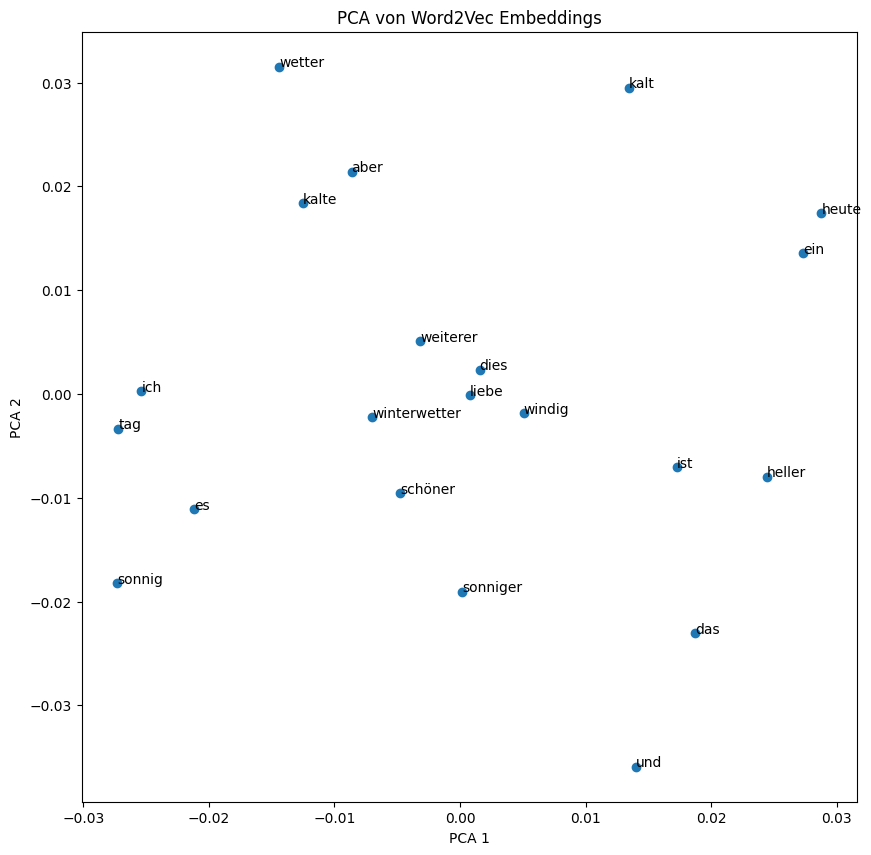

In [7]:
# PCA zur Reduktion der Dimensionsanzahl auf zwei Dimensionen
words = list(model.wv.index_to_key)
vectors = [model.wv[word] for word in words]

pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

# Plotten der Vektoren
plt.figure(figsize=(10, 10))
plt.scatter(result[:, 0], result[:, 1])

# Annotieren der Punkte mit den Wörtern
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.title('PCA von Word2Vec Embeddings')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

Mit diesem Code haben wir die Embeddings der Wörter im Korpus auf zwei Dimensionen reduziert und visualisiert. Die Wortvektoren werden in einem 2D-Raum als Punkte dargestellt, wobei jedes Wort durch ein Label annotiert ist.

**Zusammenfassung**:

* Wir haben ein Word2Vec-Modell trainiert, um Wortembeddings zu erzeugen.
* Wir konnten ähnliche Wörter anhand der Vektoren finden.
* Wir haben eine PCA durchgeführt und die Wortvektoren visualisiert.


Dies ist ein umfassender Einstieg in die Erzeugung und Nutzung von Word Embeddings mit dem Word2Vec Modell. Es zeigt auch, wie man diese Vektoren visualisiert, um ein besseres Verständnis der Beziehungen zwischen den Wörtern zu erhalten.